In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]
PyTorch version 2.8.0
Torchvision version 0.23.0
Numpy version 2.0.2
Pandas version 2.3.3


In [4]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [5]:
dataset = PlayingCardDataset(
    data_dir='/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/train'
)

In [6]:
len(dataset)

7624

41


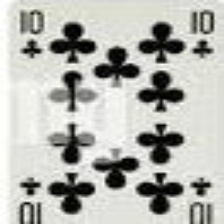

In [7]:
image, label = dataset[6000]
print(label)
image

In [8]:
data_dir = '/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [9]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = '/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/train'
dataset = PlayingCardDataset(data_dir, transform)

In [10]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [11]:
for image, label in dataset:
    break

In [12]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [13]:
for images, labels in dataloader:
    break

In [14]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [15]:
labels

tensor([ 3,  0, 42,  4,  5, 21, 42,  2, 15, 31, 36,  3, 42, 16, 41, 32, 29, 22,
        49, 47, 34,  1, 17, 31, 48, 12,  6, 14, 40, 36, 48, 42])

In [16]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [17]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [18]:
example_out = model(images)
example_out.shape

torch.Size([32, 53])

In [19]:
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


In [21]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/train'
valid_folder = '/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/valid'
test_folder = '/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [22]:
pip install --upgrade ipywidgets jupyter

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.5900027095208262, Validation loss: 0.5139337377728156


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5603241234986505, Validation loss: 0.2661905214471637


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.34436547965718217, Validation loss: 0.1376781184718294


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.2466188302539203, Validation loss: 0.1647370127012145


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.18540439271570378, Validation loss: 0.3008785886584588


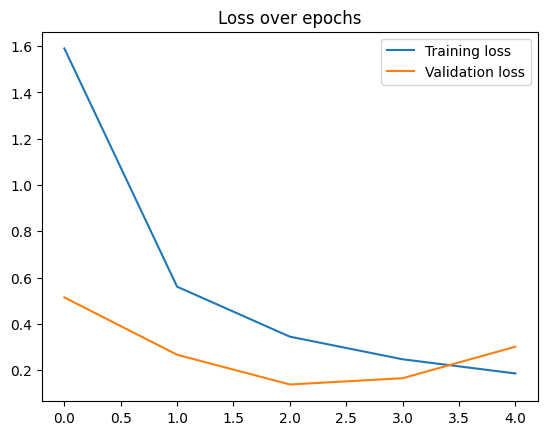

In [28]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [29]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

In [31]:
# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()


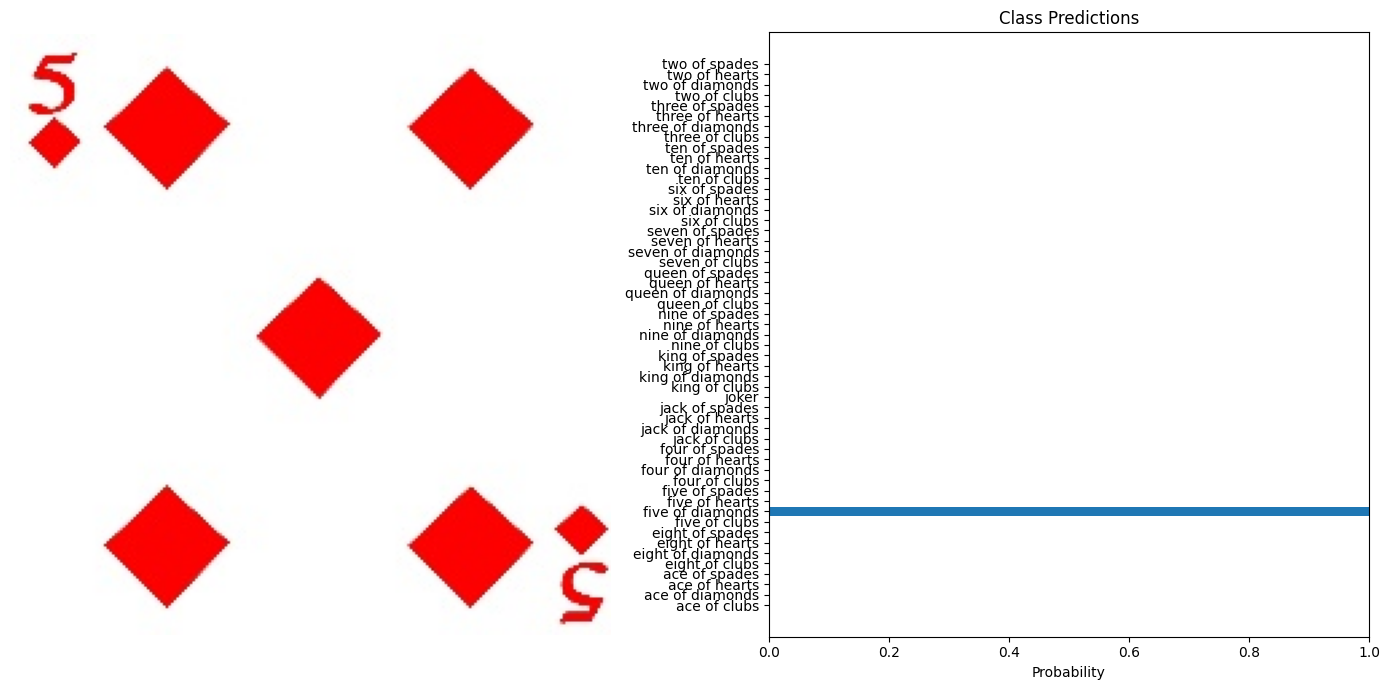

In [32]:
test_image = "/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)

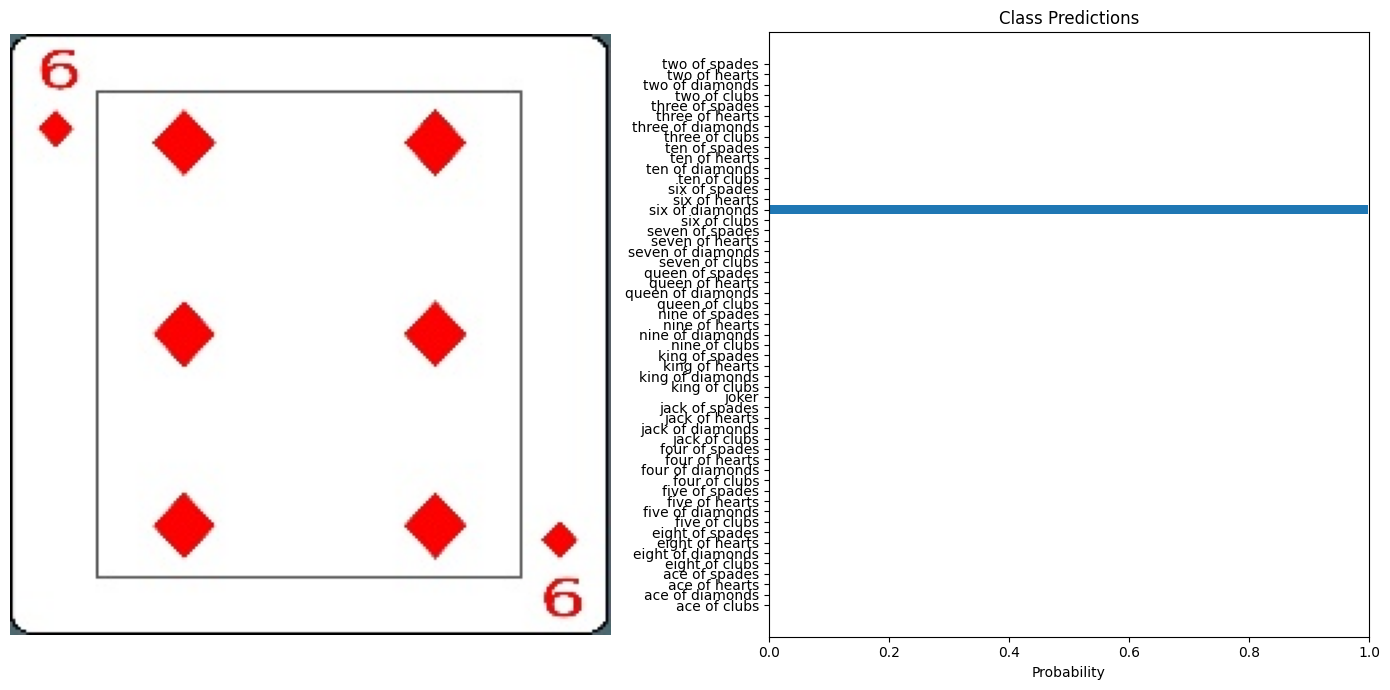

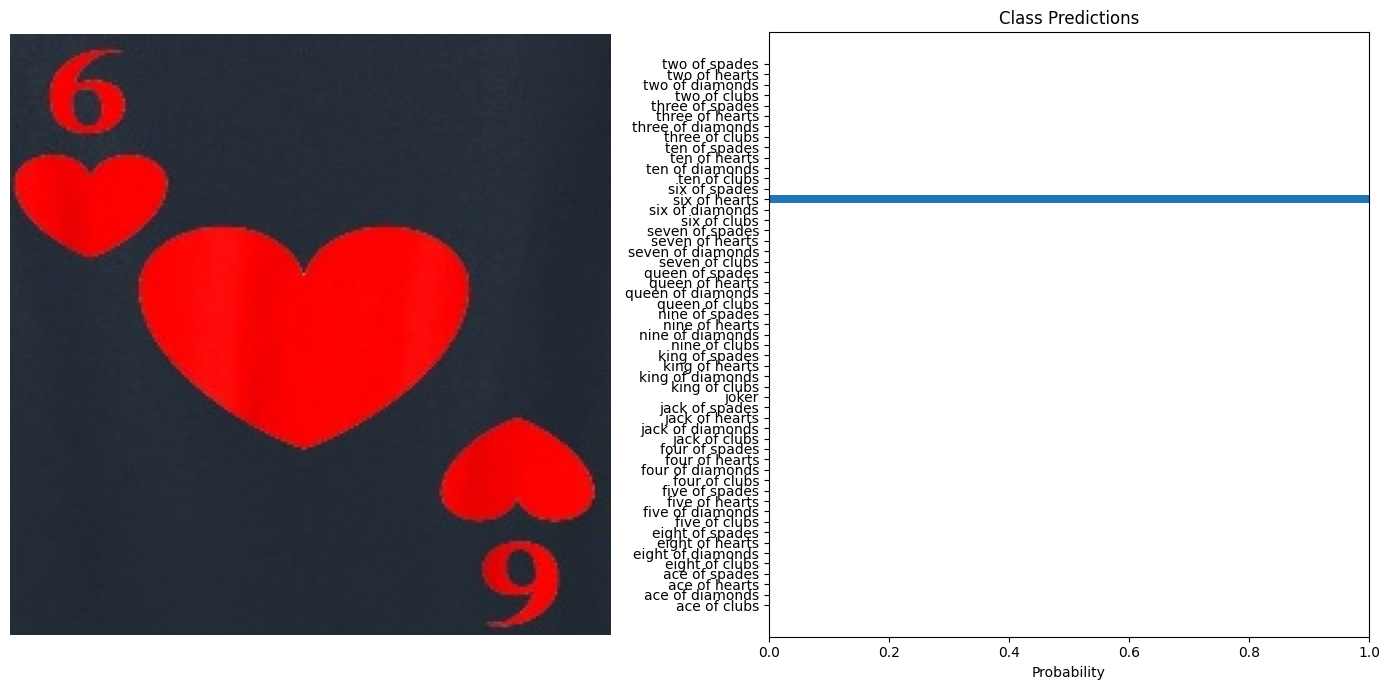

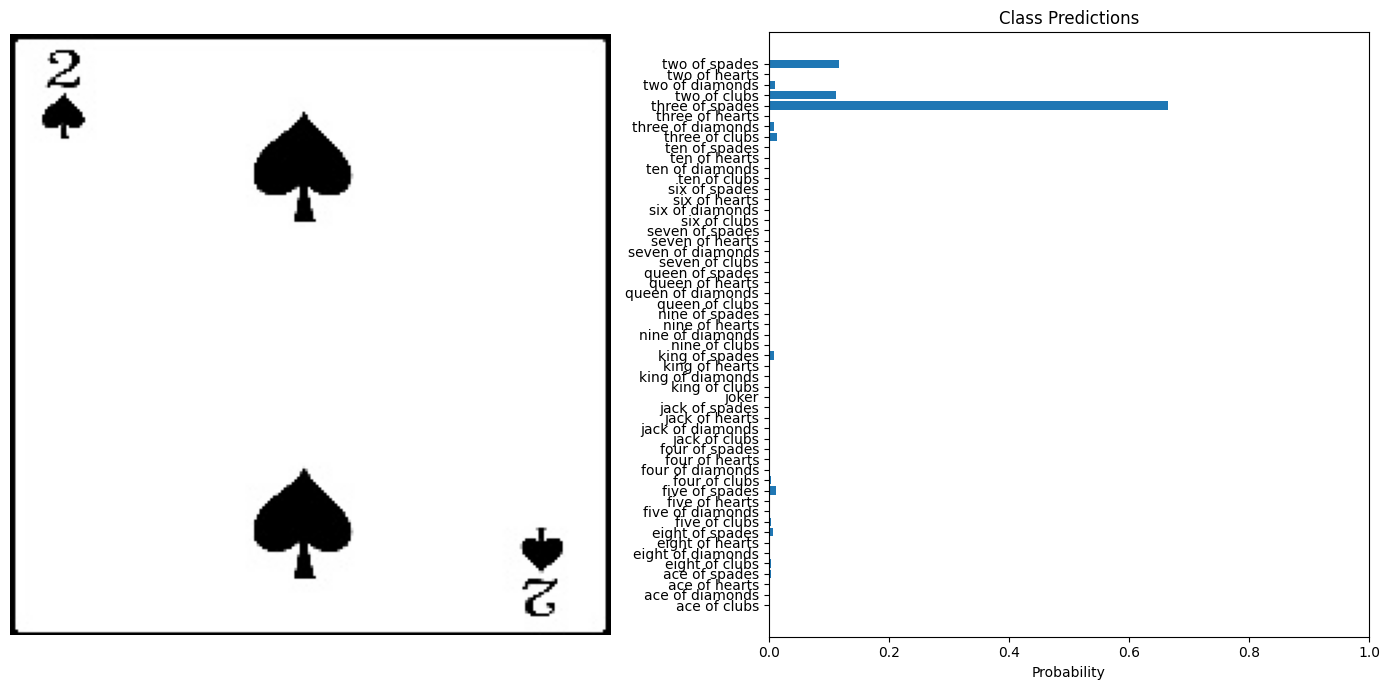

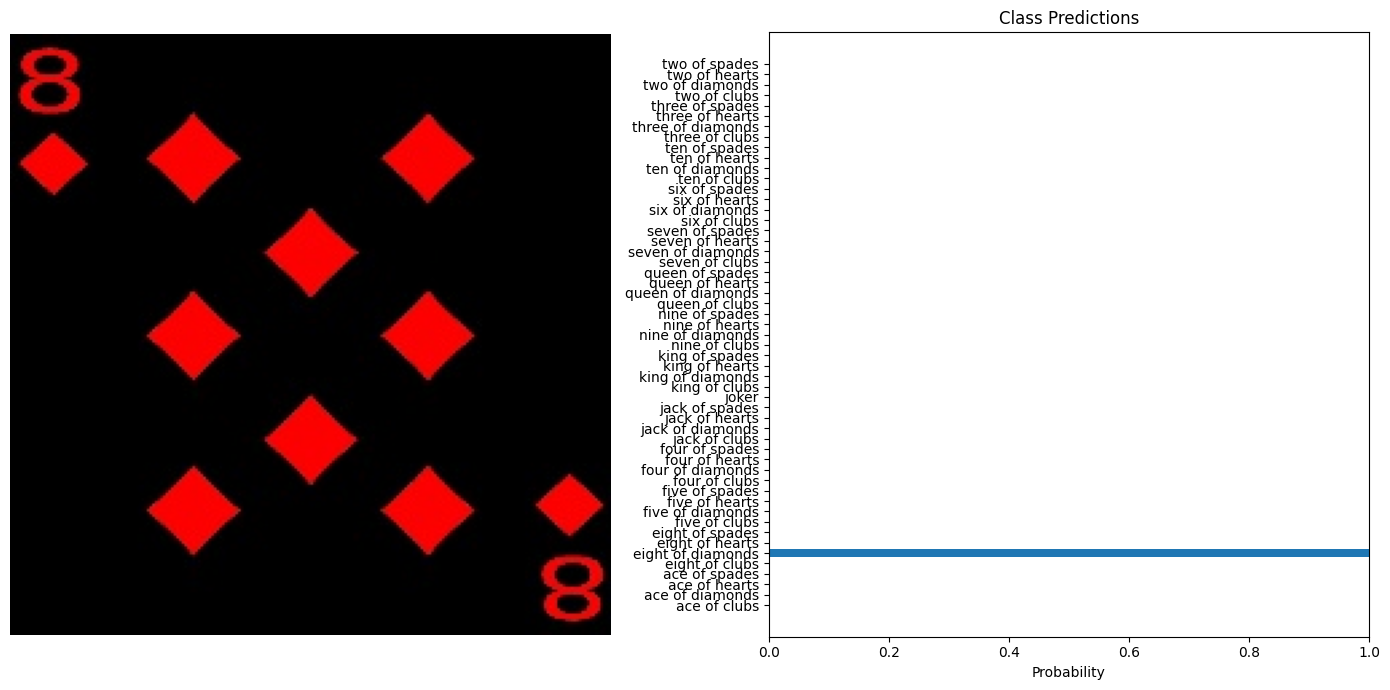

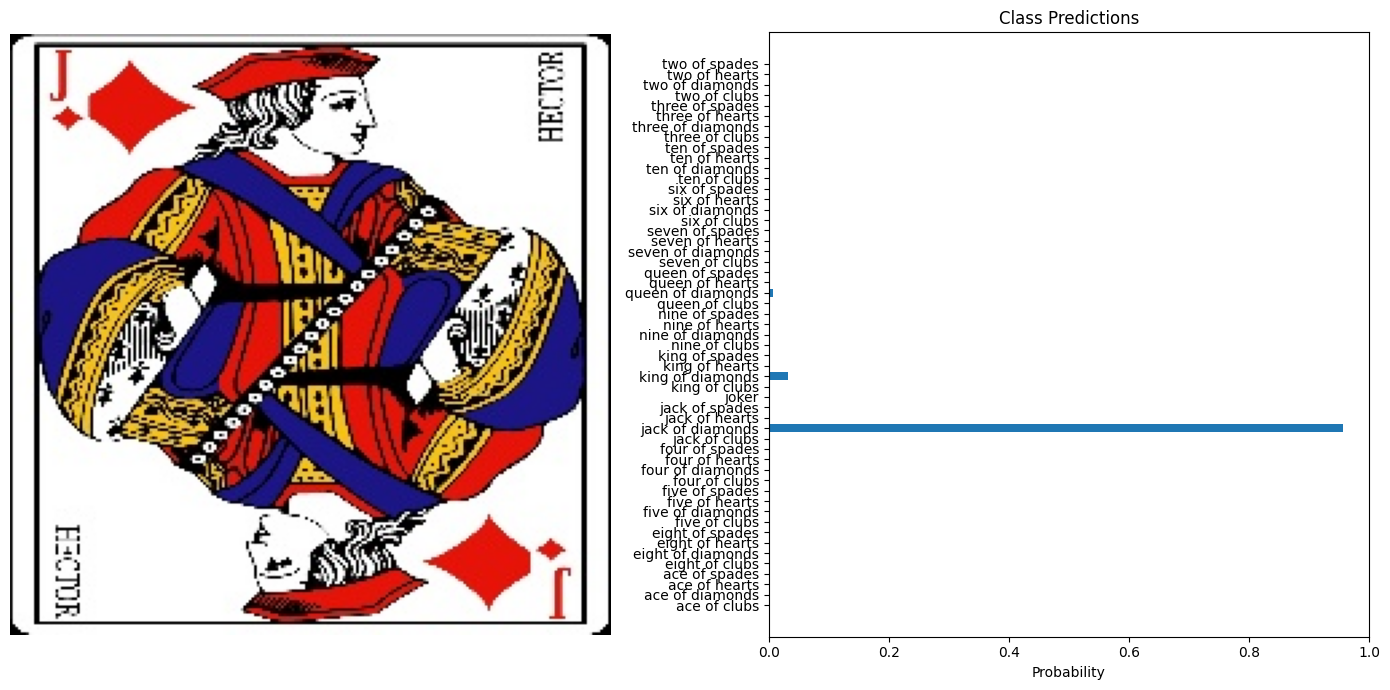

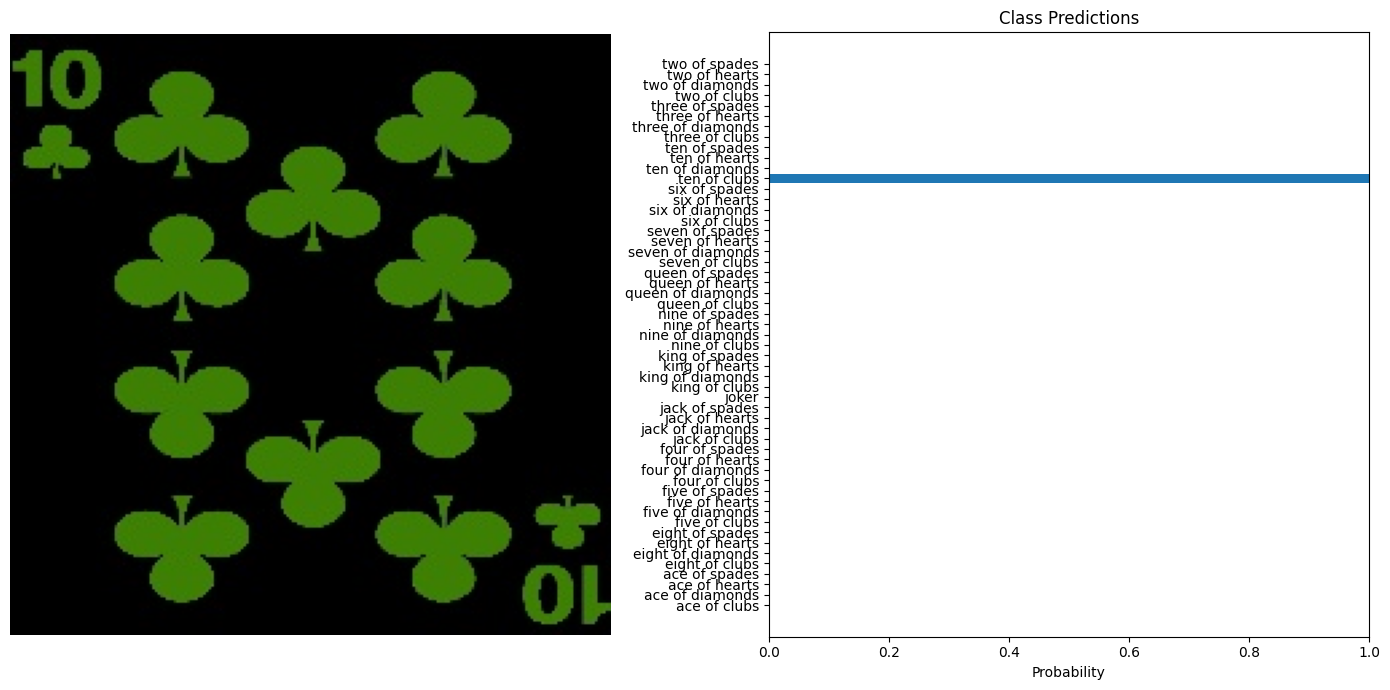

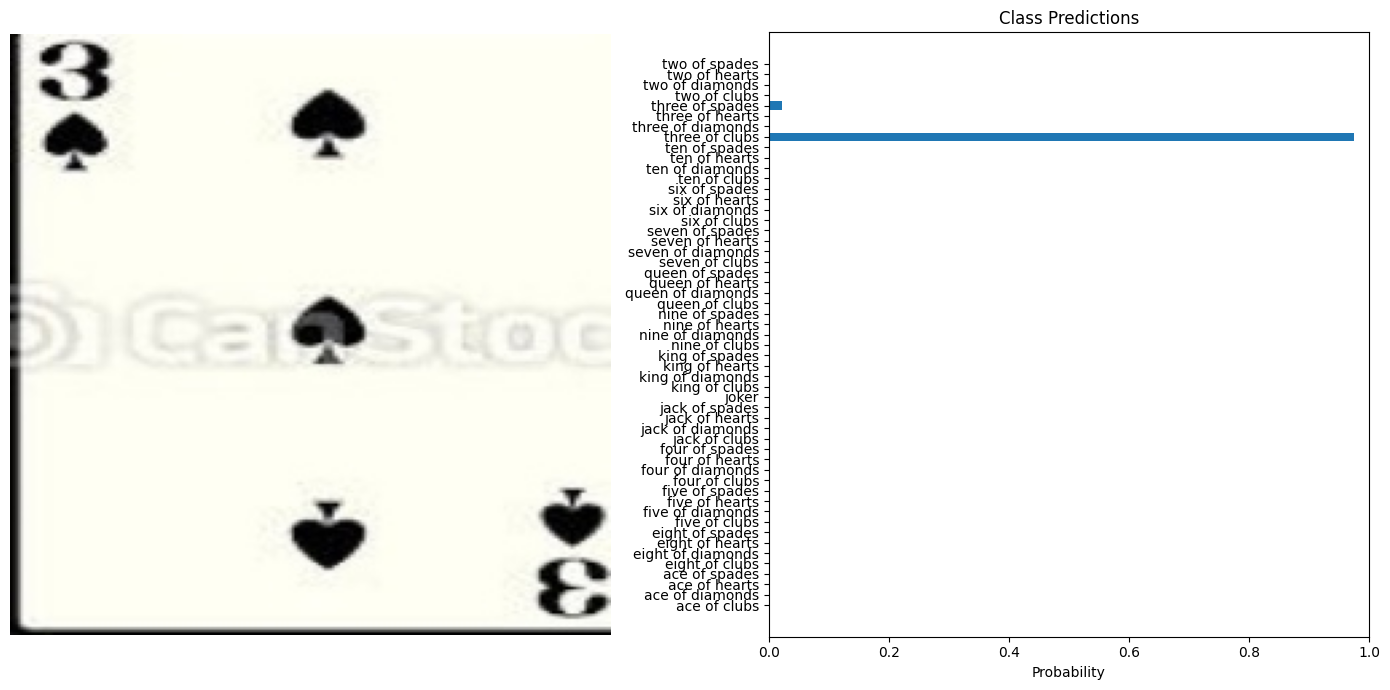

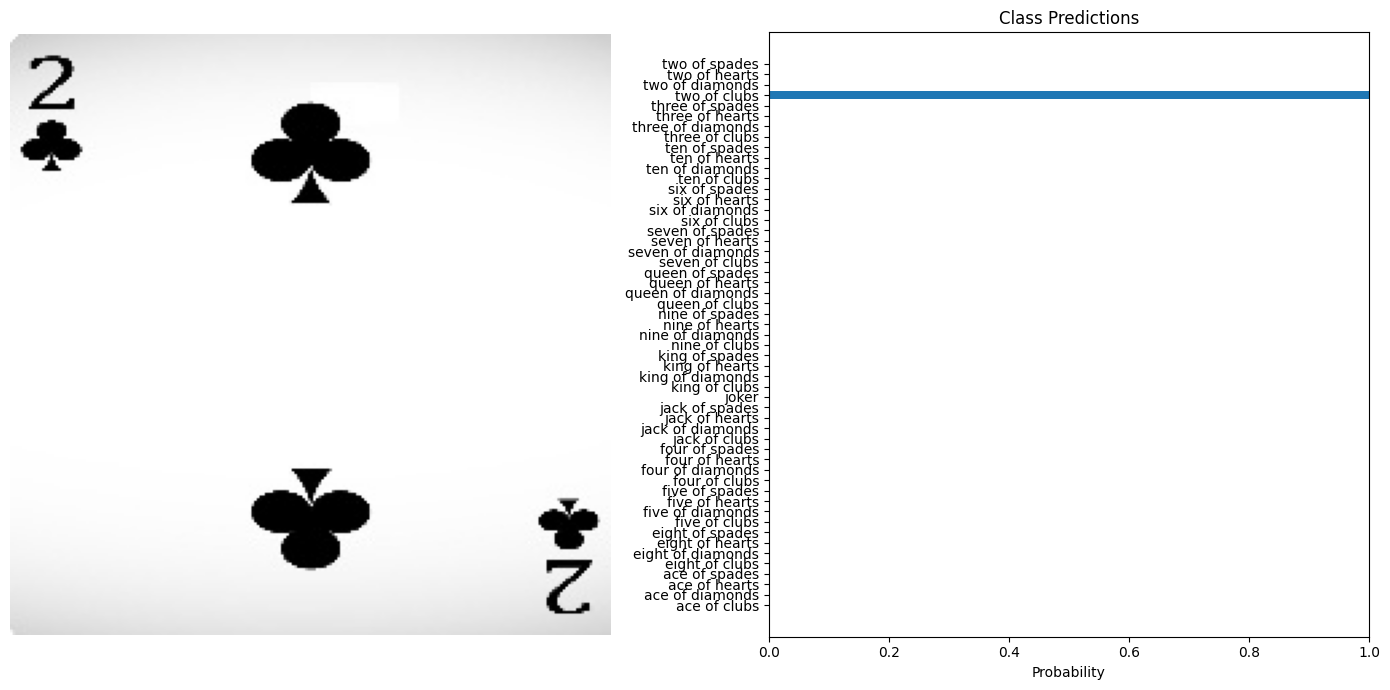

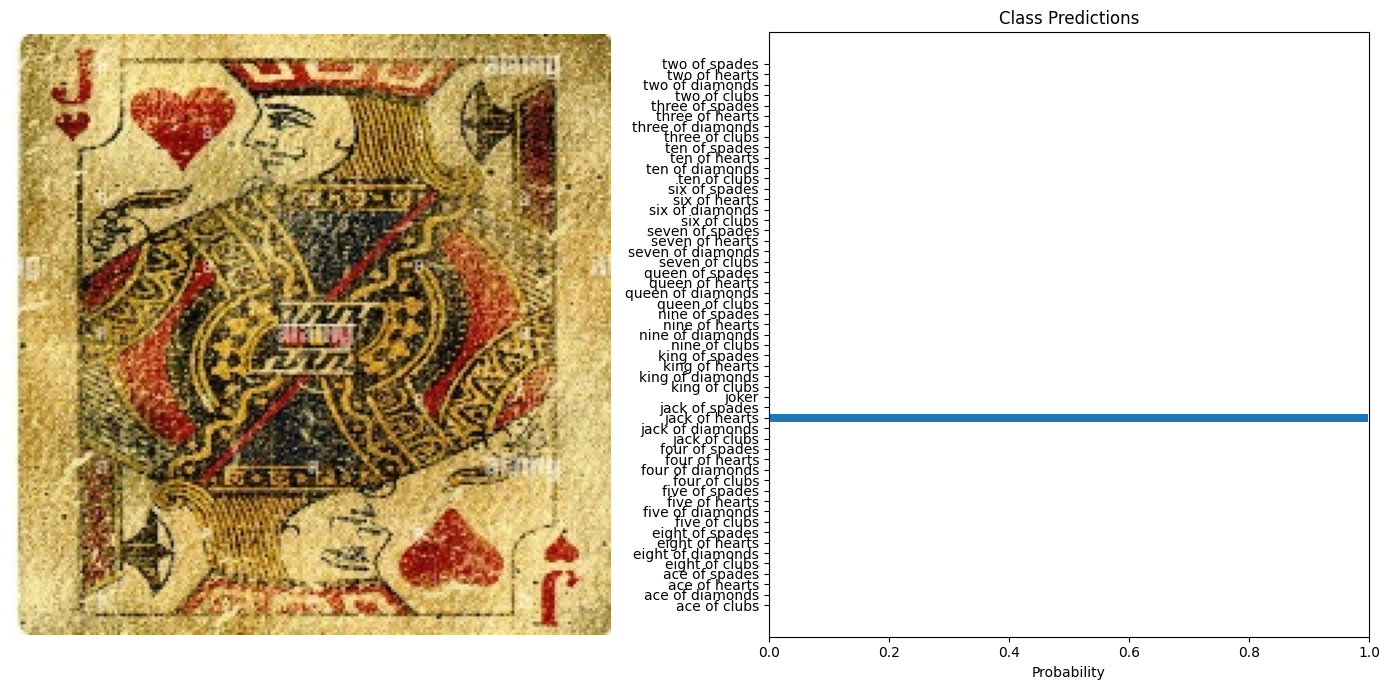

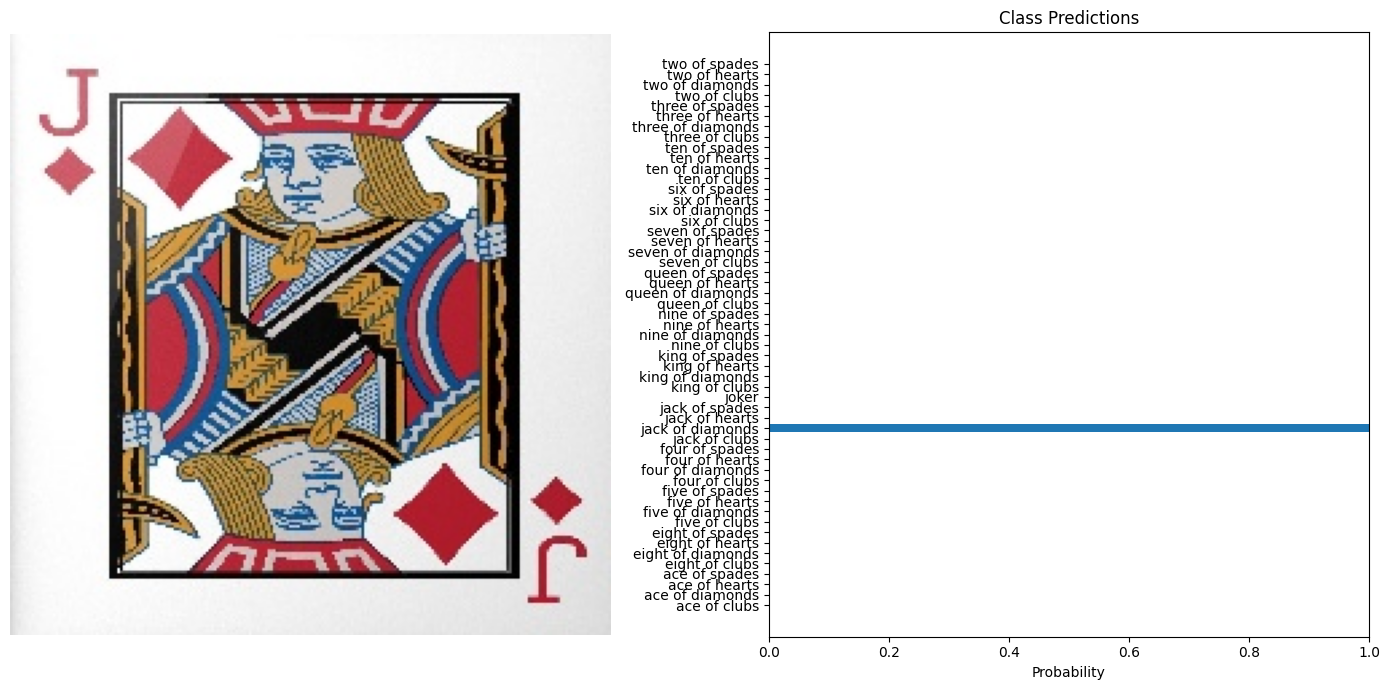

In [33]:
from glob import glob
test_images = glob('/Users/sanghyeokcho/Desktop/취활/Assignment/Cards Image Dataset-Classification/archive/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_predictions(original_image, probabilities, class_names)

In [42]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [43]:
num_epochs = 10
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()

initial_lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=initial_lr)


scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training loop'):

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)


    scheduler.step()

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation loop'):

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)


    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss:.4f}, Validation loss: {val_loss:.4f}, LR: {current_lr}")


Epoch 1/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 1/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/10 - Train loss: 1.7604, Validation loss: 0.5563, LR: 0.1


Epoch 2/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 2/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/10 - Train loss: 0.5440, Validation loss: 0.5685, LR: 0.1


Epoch 3/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 3/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/10 - Train loss: 0.2766, Validation loss: 0.2236, LR: 0.1


Epoch 4/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 4/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/10 - Train loss: 0.1406, Validation loss: 0.1634, LR: 0.1


Epoch 5/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 5/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/10 - Train loss: 0.0899, Validation loss: 0.1860, LR: 0.010000000000000002


Epoch 6/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 6/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 6/10 - Train loss: 0.0522, Validation loss: 0.1151, LR: 0.010000000000000002


Epoch 7/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 7/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 7/10 - Train loss: 0.0334, Validation loss: 0.1120, LR: 0.010000000000000002


Epoch 8/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 8/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 8/10 - Train loss: 0.0252, Validation loss: 0.1166, LR: 0.010000000000000002


Epoch 9/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 9/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 9/10 - Train loss: 0.0203, Validation loss: 0.1145, LR: 0.010000000000000002


Epoch 10/10 - Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Epoch 10/10 - Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 10/10 - Train loss: 0.0200, Validation loss: 0.1122, LR: 0.0010000000000000002


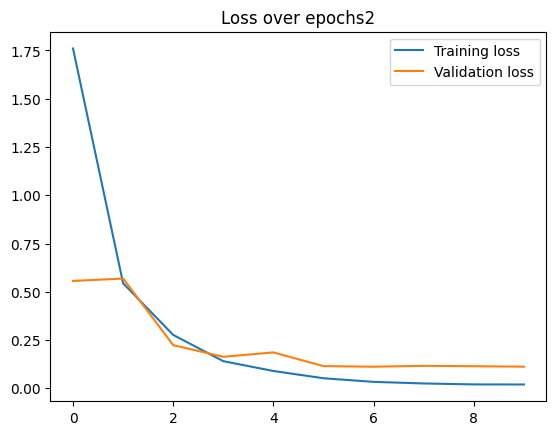

In [44]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs2")
plt.show()

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import os

In [49]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * 64 * 64, 512),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [50]:
def create_dummy_data_loaders(batch_size=32, image_size=64, num_classes=53, num_samples=1000):

    X_train = torch.randn(num_samples, 3, image_size, image_size)
    y_train = torch.randint(0, num_classes, (num_samples,))

    X_val = torch.randn(num_samples // 5, 3, image_size, image_size)
    y_val = torch.randint(0, num_classes, (num_samples // 5,))

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader

train_loader, val_loader = create_dummy_data_loaders(num_classes=53)

In [54]:
num_epochs = 50
train_losses, val_losses = [], []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()

initial_lr = 0.1
optimizer = optim.SGD(model.parameters(),
                      lr=initial_lr,
                      momentum=0.9,
                      weight_decay=1e-4)

scheduler = lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=3,
)

best_val_loss = float('inf')
best_epoch = 0
PATH = 'best_card_classifier.pth'

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'E{epoch+1}/{num_epochs} Training'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f'E{epoch+1}/{num_epochs} Validation'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        torch.save(model.state_dict(), PATH)
        print(f"--> Validation loss improved. Model saved to {PATH}")


    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss:.4f}, Validation loss: {val_loss:.4f} (Best: {best_val_loss:.4f} at E{best_epoch}), LR: {current_lr}")

    if current_lr < 1e-6:
        print("Learning rate has dropped below 1e-6. Early stopping triggered.")
        break

print(f"\nTraining finished. Best Validation Loss: {best_val_loss:.4f} at Epoch {best_epoch}")

E1/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 286.75it/s]


--> Validation loss improved. Model saved to best_card_classifier.pth
Epoch 1/50 - Train loss: 3.9856, Validation loss: 3.9862 (Best: 3.9862 at E1), LR: 0.1


E2/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 444.19it/s]


--> Validation loss improved. Model saved to best_card_classifier.pth
Epoch 2/50 - Train loss: 3.9680, Validation loss: 3.9780 (Best: 3.9780 at E2), LR: 0.1


E3/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 394.25it/s]


--> Validation loss improved. Model saved to best_card_classifier.pth
Epoch 3/50 - Train loss: 4.6714, Validation loss: 3.9765 (Best: 3.9765 at E3), LR: 0.1


E4/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 231.75it/s]


Epoch 4/50 - Train loss: 36.6032, Validation loss: 3.9932 (Best: 3.9765 at E3), LR: 0.1


E5/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 345.22it/s]


Epoch 5/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.1


E6/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 309.44it/s]


Epoch 6/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.1


E7/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 466.50it/s]


Epoch 7/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.010000000000000002


E8/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 414.00it/s]


Epoch 8/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.010000000000000002


E9/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 452.75it/s]


Epoch 9/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.010000000000000002


E10/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 481.76it/s]


Epoch 10/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.010000000000000002


E11/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 459.38it/s]


Epoch 11/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.0010000000000000002


E12/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 300.03it/s]


Epoch 12/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.0010000000000000002


E13/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 465.95it/s]


Epoch 13/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.0010000000000000002


E14/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 451.41it/s]


Epoch 14/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.0010000000000000002


E15/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 457.75it/s]


Epoch 15/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.00010000000000000003


E16/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 456.44it/s]


Epoch 16/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.00010000000000000003


E17/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 475.26it/s]


Epoch 17/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.00010000000000000003


E18/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 448.17it/s]


Epoch 18/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 0.00010000000000000003


E19/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 482.96it/s]


Epoch 19/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-05


E20/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 470.27it/s]


Epoch 20/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-05


E21/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 439.84it/s]


Epoch 21/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-05


E22/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 444.18it/s]


Epoch 22/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-05


E23/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 460.80it/s]


Epoch 23/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-06


E24/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 394.01it/s]


Epoch 24/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-06


E25/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 457.22it/s]


Epoch 25/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-06


E26/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 461.27it/s]


Epoch 26/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000004e-06


E27/50 Validation: 100%|██████████| 7/7 [00:00<00:00, 478.50it/s]

Epoch 27/50 - Train loss: nan, Validation loss: nan (Best: 3.9765 at E3), LR: 1.0000000000000005e-07
Learning rate has dropped below 1e-6. Early stopping triggered.

Training finished. Best Validation Loss: 3.9765 at Epoch 3


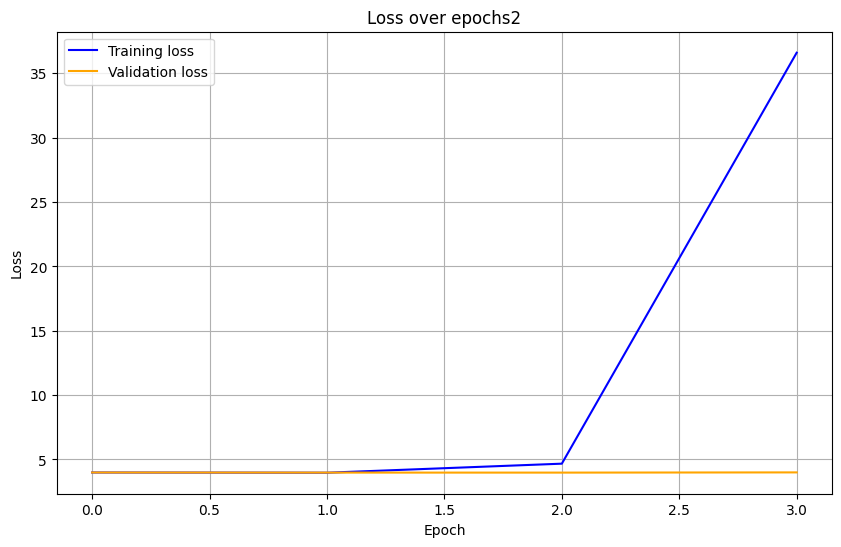

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training loss', color='blue')
plt.plot(val_losses, label='Validation loss', color='orange')

plt.title("Loss over epochs2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()